# Introducción a la clasificación de señales
A diferencia del caso de detección binaria, en el que tenemos sólo dos posibles hipótesis, $H_0$ y $H_1$, el problema de la clasificación se encuandra en un escenario de múltiples hipótesis (o clases), $H_i$, con $\{i=0,...,M-1\}$, entre las que tendremos que decidir cuál de ellas es más probable que haya sucedido, a partir de la observación $x$ realizada.

Utilizando notación vectorial, ya sea que las observaciones son de $N$ dismensiones, $\underline{x}=\{ x_1, x_2, ...,x_N \}$, o señales en el tiempo con $N$ muestras, $\underline{x}=x[n]=\{ x[0], x[1], ...,x[N-1] \}$
, la formulación del problema sería la siguiente:

\begin{equation}
H_0 : \underline{x} = \underline{s}_0 + \underline{w}\\
H_1 : \underline{x} = \underline{s}_1 + \underline{w}\\
\vdots \\
H_{M-1} : \underline{x} = \underline{s}_{M-1} + \underline{w}\\
 \tag{1}
\end{equation}
donde $\underline{w}$ serían las $N$ componentes de ruido (incertidumbre). Un caso particular sería en el que $H_0$ fuera la hipótesis nula, es decir, ausencia de señal, $H_0 : \underline{x} = \underline{w}$.

En cualquier caso, con hipótesis multiples no tiene sentido hablar de Neyman-Pearson, que era una de las alternativas en hipótesis binaria. Tan sólo podríamos utilizar el criterio de la mínima probabilidad de error, que se calcularía en este caso como:

\begin{equation}
P_E : \sum_{i,j=0,i\neq j}^{M-1}P(H_i|H_j)P(H_j)
 \tag{2}
\end{equation}

donde $P(H_i|H_j)$ es la probabilidad de escoger la hipótesis $H_i$ siendo cierta la $H_j$, y $P(H_j)$ es la probabilidad de que se dé la hipótesis $j$.
Esto es equivalente a escoger la hipótesis que maximiza la probabilidad a posteriori, conocido como criterio de *máximo a posteriori* o **MAP**, según el cual escogemos la hipótesis *k-ésima* si

\begin{equation}
P(H_k|\underline{x})>P(H_j|\underline{x}) \quad \forall j\neq k
 \tag{3}
\end{equation}

Se dice probabilidad a posterior pues es la que se calcula una vez que se conocen los datos o resultados del experimento o medida, en este caso $\underline{x}$. Según esto, la eq. (3) se podría leer como que, una vez observado $\underline{x}$, lo mas probable es que haya sucedido la hipótesis $H_k$.

Para poder calcular la probabilidad a posteirori utilizamos el teorema de Bayes, de forma que:

\begin{equation}
P(H_k|\underline{x})=\frac{p(\underline{x}|H_k)\cdot P(H_k)}{P(\underline{x})}
 \tag{4}
\end{equation}
siendo $p(\underline{x}|H_j)$ la función densidad de probabilidad (verosimilitud) de $\underline{x}$ bajo la hipótesis $H_k$, $P(H_k)$ la probabilidad (a priori) de la hipótesis $k$, y $P(\underline{x})$ la probabilidad de los datos (evidencia).

Puesto que en la mayoría de los casos las funciones de densidad de probabilidad son del tipo exponencial, recurrimos a la estrategia de aplicar logaritmos neperianos a ambos lados de la igualdad, pues la función logaritmica conserva la tendencia de la función y es más tratable matemáticamente. Así, para cada hipótesis obtenemos lo que se denomina funciones discriminantes $g_k(\underline{x})$:

\begin{equation}
\ln{P(H_k|\underline{x})}=g_k(\underline{x})=\ln{p(\underline{x}|H_k)}+\ln{P(H_k)} - \ln{P(\underline{x})}
 \tag{5}
\end{equation}

De esta forma, el criterio MAP consistiría en escoger la hipótesis con el mayor discriminante, es decir:

\begin{equation}
\underline{x} \in H_k \rightarrow g_k(\underline{x})>g_j(\underline{x}) \quad \forall j\neq k
\tag{6}
\end{equation}


# Clasificadores bayesianos ingenuos (*Naïve*)

Dentro de los clasificadores MAP que utilizan el teorema de Bayes hay una clase particular que simplifica el problema, conocidos como los clasificadores *Naïve* (ingenuos). En estos casos asumimos: primero, que los datos $\underline{x}={x_1, x_2,..., x_N}$ son independientes entre sí y gaussianos, y segundo, que en condiciones normales la probabilidad de la observación, $P(\underline{x})$, es una constante igual para todas las hipótesis, por lo que podríamos eliminarla de la expresión en (5), quedando las funciones discriminantes de la siguiente forma:

\begin{equation}
\ln{P(H_k|\underline{x})}=g_k(\underline{x})=\ln{p(\underline{x}|H_k)}+\ln{P(H_k)}
 \tag{7}
\end{equation}


# Ejemplo de Clasificadores bayesianos ingenuos (*Naïve*) - Caso escalar

Vamos a ver un ejemplo sencillo, en el que clasificamos entre 3 clases. Imaginemos un sistema de comunicaciones en el que se transmiten 3 posibles datos codificados con 3 niveles de amplitud: A ,B o C voltios. Debido al ruido electrónico, las medidas observadas $x$ están contaminadas con un ruido Gaussiano $w\sim N(\mu, \sigma^2)$, de forma que las hipótesis quedarían:

\begin{equation}
H_A: x=A+w\\
H_B: x=B+w\\
H_C: x=C+w
 \tag{8}
\end{equation}

Además, sabemos que la probabilidad de que se envíe cada uno de los niveles es la misma, es decir:

\begin{equation}
P(H_A)=P(H_B)=P(H_C)=1/3
 \tag{9}
\end{equation}

Según (7), tenemos que encontrar ahora el discriminante de cada hipótesis, que dependerá de la función de verosimilitud (función de densidad de probabilidad) de los datos para cada hipótesis y de su probabilidad, es decir:

\begin{equation}
g_k(x)=\ln{p(x|H_k)}+\ln{P(H_k)}
 \tag{10}
\end{equation}

Si tenemos en cuenta (8), las funciones de verosimilitud son gausianas de igual distribución que el ruido desplazadas hacia el valor de amplitud transmitido, es decir, para la amplitud $k$ tendríamos que $p(x|H_k)\sim N(k+\mu, \sigma^2)$, con lo que el discriminante *k-ésimo* quedaría:

\begin{equation}
g_k(x)=\ln\left ( \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-k-\mu)^2}{2\sigma^2}} \right )+\ln{P(H_k)}=\ln{\left (\frac{1}{\sqrt{2\pi}\sigma}\right )}-\frac{(x-k-\mu)^2}{2\sigma^2}+\ln{P(H_k)}
 \tag{11}
\end{equation}

Si tenemos en cuenta que el primer y tercer término es el mismo en todos los discriminantes, podemos eliminarlos, y desarrollando el segundo término obtendríamos:

\begin{equation}
g_k(x)=-\frac{x^2-2xk-2x\mu+2k\mu+k^2+\mu^2}{2\sigma^2}
 \tag{12}
\end{equation}

Supongamos en este ejemplo que el ruido es de media $\mu=0$ y varianza $\sigma^2=1$, entonces:

\begin{equation}
g_{k}(x)=-\frac{x^2-2xk+k^2}{2}
 \tag{13}
\end{equation}

Supongamos así mismo que $A=-1 V$, $B=0 V$ y $C=+1 V$. Sustituyendo $k$ en cada discriminante por la amplitud correspondiente tendríamos:

\begin{equation}
g_{-1}(x)=\frac{-x^2-2x+1}{2}\\
g_{0}(x)=\frac{-x^2}{2}\\
g_{+1}(x)=\frac{-x^2+2x+1}{2}
 \tag{14}
\end{equation}

Para encontrar las regiones de decisión, recordando (6), debemos tener en cuenta que:

\begin{equation}
\underline{x} \in H_k \rightarrow g_k(\underline{x})>g_j(\underline{x}) \quad \forall j\neq k
\tag{15}
\end{equation}

Comenzaremos con la region de $H_{-1}$. Para que clasifiquemos una observación $x$ perteneciente a esa clase se tiene que dar:

\begin{equation}
g_{-1}(x)>g_0(x) \rightarrow \frac{-x^2-2x+1}{2}>\frac{-x^2}{2} \rightarrow x<-\frac{1}{2}\\
g_{-1}(x)>g_1(x) \rightarrow \frac{-x^2-2x+1}{2}>\frac{-x^2+2x+1}{2} \rightarrow x< 0
 \tag{16}
\end{equation}

Puesto que se tienen que dar las dos condiciones, la región de decisión será la intersección de ambas regiones, es decir, $R_{-1}=\{x|x<-1/2\}$.

Seguimos con la region de $H_{0}$. Para que clasifiquemos una observación $x$ perteneciente a esa clase se tiene que dar:

\begin{equation}
g_{0}(x)>g_{-1}(x) \rightarrow \frac{-x^2}{2}>\frac{-x^2-2x+1}{2} \rightarrow x>-\frac{1}{2}\\
g_{0}(x)>g_1(x) \rightarrow \frac{-x^2}{2}>\frac{-x^2+2x+1}{2} \rightarrow x< 1/2
 \tag{17}
\end{equation}

Puesto que se tienen que dar las dos condiciones, la región de decisión será la intersección de ambas regiones, es decir, $R_{0}=\{x|-1/2< x< 1/2\}$.

Por último, para la region de $H_{1}$. Para que clasifiquemo una observación $x$ perteneciente a esa clase se tiene que dar:

\begin{equation}
g_{1}(x)>g_{-1}(x) \rightarrow \frac{-x^2+2x+1}{2}>\frac{-x^2-2x+1}{2} \rightarrow x>0\\
g_{1}(x)>g_1(0) \rightarrow \frac{-x^2+2x+1}{2}>\frac{-x^2}{2} \rightarrow x> 1/2
 \tag{18}
\end{equation}

Puesto que se tienen que dar las dos condiciones, la región de decisión será la intersección de ambas regiones, es decir, $R_{1}=\{x| x> 1/2\}$.

Quedaría pendiente ahora calcular la probabilidad de error del clasificador, para lo que recurriremos a la expresión (2):

\begin{equation}
P_E : \sum_{i,j=0,i\neq j}^{M-1}P(H_i|H_j)P(H_j)=\\
=P(H_0|H_{-1})P(H_{-1}) + P(H_1|H_{-1})P(H_{-1})\\
 + P(H_{-1}|H_0)P(H_0) +P(H_1|H_0)P(H_0)\\
 + P(H_{-1}|H_1)P(H_1) + P(H_0|H_1)P(H_1)
 \tag{19}
\end{equation}

Teniendo en cuenta que, tal y como están definidas, las funciones de verosimilitud (de densidad de probabilidad) de cada hipótesis son gausianas desplazadas hacia el valor constante $k$ de cada una de ellas, es decir:

\begin{equation}
p(x|H_{-1})\sim N(-1,1)\\
p(x|H_{0})\sim N(0,1)\\
p(x|H_{1})\sim N(1,1)
 \tag{20}
\end{equation}

Las probabilidades de error de cada combinación serían:

\begin{equation}
P(H_i|H_j)=P(x\in R_i|H_j)=\int_{x\in R_i}p(x|H_{j})\partial x
 \tag{21}
\end{equation}

**Nota: En este caso particular, puesto que las probabilidades de todas las hipótesis son las mismas, podría haberse simplificado el cálculo de la probabilidad de error utilizando las probabilidades complementarias.*

Para que resulte más sencillo de interpretar, vamos a representar las funciones de verosimilitud y las regiones de decisión, para lo que usaremos el código de la siguiente celda. Permitimos al usuario introducir la potenica media de ruido en la variable NoisePower. En este ejemplo, como se deduce de las expresiones en (12), la potencia del ruido no influye en el cálculo de los discriminantes, pues en todos influye por igual, con lo que podríamos haberla eliminado. Sin embargo sí influye en las funciones de verisimilitud de cada hipótesis, pues influye en cómo de separadas aparecerán las observaciones, o visto de otra forma, en cómo se concentran en torno a sus respectivas medias.


La probabilidad de error del clasificador es: 0.07589753200443872
La probabilidad de error empírica del clasificador es: 0.05666666666666667



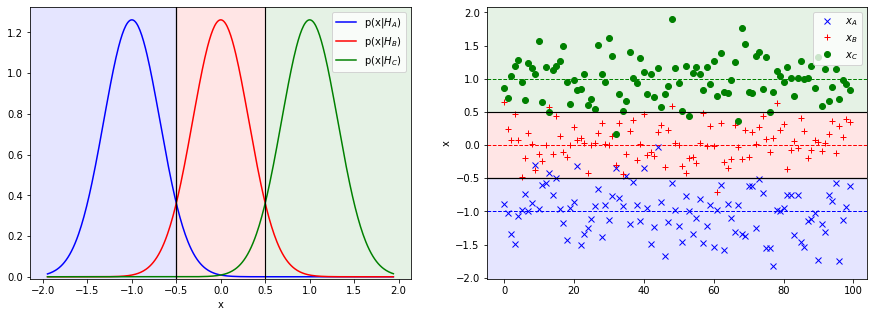

In [ ]:
#@title Ejemplo clasificación escalar bayesiana ingenua

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats


# Constantes y parámetros del experimento
A = -1 # Amplitud bajo hipótesis H{-1}
B = 0 # Amplitud bajo hipótesis H{0}
C = 1 # Amplitud bajo hipótesis H{1}
PHA = 1/3 # probabilidad de hipótesis H{-1}
PHB = 1/3 # probabilidad de hipótesis H{0}
PHC = 1/3 # probabilidad de hipótesis H{1}
NoiseMean = 0  # Media del ruido
# NoisePower = 1 # Potenica media del ruido (varianza)
NoisePower = 0.1 #@param {type:"slider", min:0.01, max:1, step:0.01}
# NoisePower = 0.5 #@param {type:"number"}


# Límites de las regiones de decisión. Estos dependerán de los estadísticos
# y de los valores obtenidos en los discriminantes
R_AB = -1/2
R_BC = 1/2

# Creamos el rango de las observaciones. Para ser coherente, debe estar por debajo
# de la mínima amplitud posible y por encima de la máxima, y tener en cuenta
# las medias y varianzas. Para estar seguro, nos pondremos en el peor caso
x_min = np.min(np.array([A, B, C])) - 2 * np.abs(NoiseMean) - 3 * np.sqrt(NoisePower)
x_max = np.max(np.array([A, B, C])) + 2 * np.abs(NoiseMean) + 3 * np.sqrt(NoisePower)
x_values = np.arange(x_min, x_max, 0.01)

# creamos las funciones de densidad de probabilidad de cada hipótesis
pdf_HA = stats.norm(A + NoiseMean, np.sqrt(NoisePower))
pdf_HB = stats.norm(B + NoiseMean, np.sqrt(NoisePower))
pdf_HC = stats.norm(C + NoiseMean, np.sqrt(NoisePower))


fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
# representamos las pdf
axs[0].plot(x_values, pdf_HA.pdf(x_values), color='blue', label='p(x|$H_{A}}$)')
axs[0].plot(x_values, pdf_HB.pdf(x_values), color='red', label='p(x|$H_{B}}$)')
axs[0].plot(x_values, pdf_HC.pdf(x_values), color='green', label='p(x|$H_{C}}$)')
# Representamos las fronteras de las regiones de decisión con líneas negras
axs[0].axvline(x=R_AB, color='black', linestyle='-', linewidth=1.25, alpha=1)
axs[0].axvline(x=R_BC, color='black', linestyle='-', linewidth=1.15, alpha=1)
axs[0].set_ylim(bottom=-0.01)
axs[0].set_xlabel('x')
axs[0].legend()

# Ahora vamos a simular observaciones para las 3 hipótesis y ver cómo se
# comporta el clasificador.
No = 100 # número de observaciones por cada hipótesis
x_A = pdf_HA.rvs(size=No) # generamos números aleatorios según p(x|H_A)
x_B = pdf_HB.rvs(size=No) # generamos números aleatorios según p(x|H_B)
x_C = pdf_HC.rvs(size=No) # generamos números aleatorios según p(x|H_C)
# representamos observaciones
axs[1].plot(x_A, color='blue', linestyle='', marker='x', label='$x_A$')
axs[1].plot(x_B, color='red', linestyle='', marker='+', label='$x_B$')
axs[1].plot(x_C, color='green', linestyle='', marker='o', label='$x_C$')
# representamos valores de los símbolos sin ruido
axs[1].axhline(y=A, color='blue', linestyle='--', linewidth=1, alpha=1)
axs[1].axhline(y=B, color='red', linestyle='--', linewidth=1, alpha=1)
axs[1].axhline(y=C, color='green', linestyle='--', linewidth=1, alpha=1)
# representamos límites de las regiones de decisión
axs[1].axhline(y=R_AB, color='black', linestyle='-', linewidth=1.25, alpha=1)
axs[1].axhline(y=R_BC, color='black', linestyle='-', linewidth=1.15, alpha=1)
axs[1].set_ylabel('x')
axs[1].legend()

Relleno_Regiones = True #@param {type:"boolean"}
if Relleno_Regiones:
  # rellenamos regiones de decision
  y_axs0 = axs[0].get_ylim()
  y_width0 = np.abs(y_axs0[1]-y_axs0[0])
  x_axs0 = axs[0].get_xlim()
  x_width_A = np.abs(R_AB - x_axs0[0])
  x_width_B = np.abs(R_BC - R_AB)
  x_width_C = np.abs(x_axs0[1]-R_BC)
  axs[0].add_patch(plt.Rectangle((x_axs0[0], y_axs0[0]), x_width_A, y_width0,
                            facecolor = 'blue', fill=True, alpha=0.1))
  axs[0].add_patch(plt.Rectangle((R_AB, y_axs0[0]), x_width_B, y_width0,
                            facecolor = 'red', fill=True, alpha=0.1))
  axs[0].add_patch(plt.Rectangle((R_BC, y_axs0[0]), x_width_C, y_width0,
                            facecolor = 'green', fill=True, alpha=0.1));

  x_axs1 = axs[1].get_xlim()
  x_width1 = np.abs(x_axs1[1]-x_axs1[0])
  y_axs1= axs[1].get_ylim()
  y_width_A = np.abs(R_AB - y_axs1[0])
  y_width_B = np.abs(R_BC - R_AB)
  y_width_C = np.abs(y_axs1[1]-R_BC)
  axs[1].add_patch(plt.Rectangle((x_axs1[0], y_axs1[0]), x_width1, y_width_A,
                            facecolor = 'blue', fill=True, alpha=0.1))
  axs[1].add_patch(plt.Rectangle((x_axs1[0], R_AB), x_width1, y_width_B,
                             facecolor = 'red', fill=True, alpha=0.1))
  axs[1].add_patch(plt.Rectangle((x_axs1[0], R_BC), x_width1, y_width_C,
                            facecolor = 'green', fill=True, alpha=0.1))

# calculo teórico probabilidad error
Pet_HA = (pdf_HA.cdf(R_BC)-pdf_HA.cdf(R_AB)) * PHA + (1-pdf_HA.cdf(R_BC)) * PHA
Pet_HB = pdf_HB.cdf(R_AB) * PHB + (1-pdf_HB.cdf(R_BC)) * PHB
Pet_HC = pdf_HC.cdf(R_AB) * PHC + (pdf_HC.cdf(R_BC)-pdf_HC.cdf(R_AB)) * PHC
Pet = Pet_HA + Pet_HB + Pet_HC
print("\033[1m") # para escribir en negrita
print('La probabilidad de error del clasificador es: ' + str(Pet))

# Cálculo empírico de la probabilidad de error
Pee_HA = np.sum(x_A > R_AB)/No # Nº puntos bajo HA fuera de la región HA / Nº HA
Pee_HB = (np.sum(x_B < R_AB) + np.sum(x_B > R_BC))/No # Nº puntos bajo HB fuera de la región HB / Nº HB
Pee_HC = np.sum(x_C < R_BC)/No # Nº puntos bajo HC fuera de la región HC / Nº HC
Pee = Pee_HA*PHA + Pee_HB*PHB + Pee_HC*PHC
print('La probabilidad de error empírica del clasificador es: ' + str(Pee))
print("\033[0;0m"); # para quitar negritas


# Clasificadores bayesianos de forma de onda
En el caso de clasificación de señales con forma de onda conocida, el punto de partida es el mismo. Si los registros de señal tienen $N$ muestras, las señales observadas serían del tipo $\underline{x}=x[n]=\{ x[0], x[1], ...,x[N-1] \}$
, y considerando $M$ posibles formas de onda diferente, la formulación del problema sería la siguiente:

\begin{equation}
H_0 : \underline{x} = \underline{s}_0 + \underline{w}\\
H_1 : \underline{x} = \underline{s}_1 + \underline{w}\\
\vdots \\
H_{M-1} : \underline{x} = \underline{s}_{M-1} + \underline{w}\\
 \tag{1}
\end{equation}
donde $\underline{w}=w[n]=\{ w[0], w[1], ...,w[N-1] \}$ serían las $N$ componentes de ruido (incertidumbre), que en este caso asumiremos que son independientes e identicamente distribuidas (i.i.d.) con distribución Gausiana de media $\mu=0$ y varianza igual a la potencia del ruido $\sigma^2$, es decir:

\begin{equation}
w[n]\sim N(0,\sigma^2) \quad \forall n
 \tag{22}
\end{equation}

En este caso, para cada clase o forma de onda $\underline{s}_k$, cada una de las muestras $x[n]$ de la señal observada seguirá una distribución Gaussiana de varianza igual a la del ruido y media igual al valor de la muestra correspondiente de la forma de onda, es decir, que bajo la hipótesis $H_k$, para la muestra *n-ésima*:

\begin{equation}
x[n]\sim N(s_k[n],\sigma^2)\sim \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x[n]-s_k[n])^2}{2\sigma^2}} \quad \forall n
 \tag{23}
\end{equation}

Ahora tendríamos que calcular el discriminante de cada clase $H_k$, que recordando (5) se calcularía como:

\begin{equation}
g_k(\underline{x})=\ln{p(\underline{x}|H_k)}+\ln{P(H_k)}+\ln{P(\underline{x})}
 \tag{24}
\end{equation}
donde en este caso la función de verosimilitud $p(\underline{x}|H_k)$ seguiría una distribución Gaussiana multidimensional, al ser cada muestra i.i.d. Gaussiana. Es decir, que la función de verosimilitud se podría calcular como el producto de las funciones de verosimilitud de cada muestra:

\begin{equation}
p(\underline{x}|H_k)=\prod_{n=0}^{N-1}p(x[n]|H_k)=\prod_{n=0}^{N-1}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x[n]-s_k[n])^2}{2\sigma^2}}=(2\pi\sigma^2)^{-N/2}e^{-\frac{1}{2\sigma^2}(\underline{x}-\underline{s}_k)^T(\underline{x}-\underline{s}_k)}  
 \tag{25}
\end{equation}
y sustituyendo lo anterior en (24):

\begin{equation}
g_k(\underline{x})=-\frac{N}{2}\ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}(\underline{x}-\underline{s}_k)^T(\underline{x}-\underline{s}_k)+\ln{P(H_k)}+\ln{P(\underline{x})}
 \tag{26}
\end{equation}

Si tenemos en cuenta que $N$, $\sigma$ y $\ln{P(\underline{x})}$ son iguales para todas las hipótesis, podemos eliminar el primer y último término de la suma en todos los discriminantes, y, desarrollando el producto de vectores:

\begin{equation}
g_k(\underline{x})=-\frac{1}{2\sigma^2}\left ( \sum_{n=0}^{N-1}x[n]^2 - 2\sum_{n=0}^{N-1}s_k[n]x[n] +\sum_{n=0}^{N-1}s_k[n]^2\right )+\ln{P(H_k)}
 \tag{27}
\end{equation}
donde el primer y tercer término son las energías de la señal observada y la forma de onda *k-ésima* respectivamente:

\begin{equation}
E_x=\sum_{n=0}^{N-1}x[n]^2\\
E_k=\sum_{n=0}^{N-1}s_k[n]^2
 \tag{28}
\end{equation}
y sustituyendo (28) en (27):

\begin{equation}
g_k(\underline{x})=-\frac{E_x}{2\sigma^2} + \frac{1}{\sigma^2}\sum_{n=0}^{N-1}s_k[n]x[n] -\frac{E_k}{2\sigma^2} +\ln{P(H_k)}
 \tag{29}
\end{equation}

Si eliminamos el término que contiene la energía de la observación $E_{x}$ pues es el mismo para todos las hipótesis, y multiplicamos en ambos lados de la igualdad por $\sigma^2$, obtenemos el nuevo discriminante $g'_k(\underline{x})=\sigma^2g_k(\underline{x})$ tal que:

\begin{equation}
g'_k(\underline{x})=\sum_{n=0}^{N-1}s_k[n]x[n] - \gamma_k
 \tag{30}
\end{equation}
donde para cada hipótesis $\gamma_k$ sería:
\begin{equation}
\gamma_k=\frac{E_k-2\sigma^2\ln{P(H_k)}}{2}
 \tag{31}
\end{equation}

Si observamos detenidamente (30) y (31) podemos realizar las siguientes observaciones:
*   Maximizar $g'_k(\underline{x})$ es lo mismo que maximizar $g_k(\underline{x})$ pues la primera está escalada por una constante positiva.
*   El primer término, que es el que depende de la observación, es la correlación entre la observación y cada forma de onda.
*   Si se tratase de un sistema de comunicaciones, generlamente todos los símbolos tienen igual probabilidad y la misma energía, con lo que $\gamma_k$ sería igual en todos los casos y podríamos eliminarla.

En este último caso, que es lo habitual en comunicaciones, el problema se reduce a correlar la señal observada (lo que se recibe), con todas las posibles formas de onda, y quedarnos con el máximo de entre todos los resultados. Esto se suele conocer como un banco de correladores o filtros adaptados, y en su versión general se representa graficamente mediante el siguiente esquema, que facilita el diseño del algoritmo de clasificación:

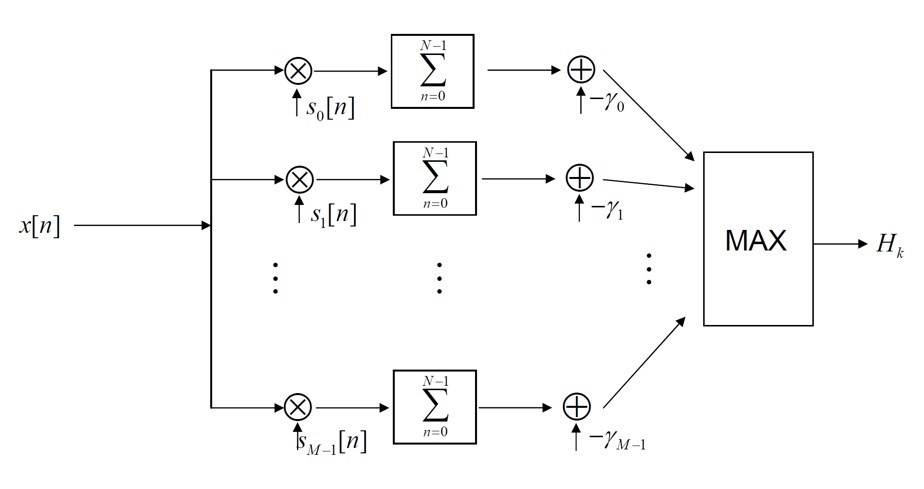

# Ejemplo de aplicación: Clasificador bayesiano de señales (formas de onda)

Vamos a implementar ahora un ejemplo con un sistema de comunicaciones básico tipo QPSK (*Quadrature Phase Shift Keying*), diseñando un clasificador (detector) que resuleva entre los diferentes símbolos enviados.

La expresión general de la portadora del símbolo *n-ésimo*, en el diagrama de constelación de ondas en fase y cuadratura, es:

\begin{equation}
s_k(t)=\sqrt{\frac{2E_s}{T_s}}\cos{\Big(2\pi F_c t + (2k-1)\frac{\pi}{4}\Big)}, \quad k=1, 2, 3, 4
 \tag{32}
\end{equation}

siendo $E_s$ la energía de símbolo, $T_s$ el periodo de símbolo, $F_c$ la frecuencia de la portadora en Hz, y $k$ el número de símbolo, cuyos valores proporciona las fases $\Phi=\{\pi/4, 3\pi/4, 5\pi/4, 7\pi/4\}$. Si sustituimos y descomponemos en sumas y restas de sinusoides, obtenemos los símbolos:

\begin{equation}
s_1(t)=\sqrt{\frac{E_s}{T_s}}\cdot \Big( \cos{(2\pi F_c t)}-\sin{(2\pi F_c t)} \Big)\\
s_2(t)=\sqrt{\frac{E_s}{T_s}}\cdot \Big( -\cos{(2\pi F_c t)}-\sin{(2\pi F_c t)} \Big)\\
s_3(t)=\sqrt{\frac{E_s}{T_s}}\cdot \Big( -\cos{(2\pi F_c t)}+\sin{(2\pi F_c t)} \Big)\\
s_4(t)=\sqrt{\frac{E_s}{T_s}}\cdot \Big( \cos{(2\pi F_c t)}+\sin{(2\pi F_c t)} \Big)\\
 \tag{33}
\end{equation}

Las ondas portadoras son representadas con las funciones base en fase $\phi_1(t)$ y cuadratura $\phi_2(t)$:

\begin{equation}
\phi_1(t)=\sqrt{\frac{2}{T_s}}\cos{(2\pi F_c t)}\\
\phi_2(t)=\sqrt{\frac{2}{T_s}}\sin{(2\pi F_c t)}
 \tag{34}
\end{equation}
generando una constelación de símbolos en el plano complejo $\{I,Q\}$ de coordenadas $(\pm\sqrt{E_s/2}, \pm\sqrt{E_s/2})$.


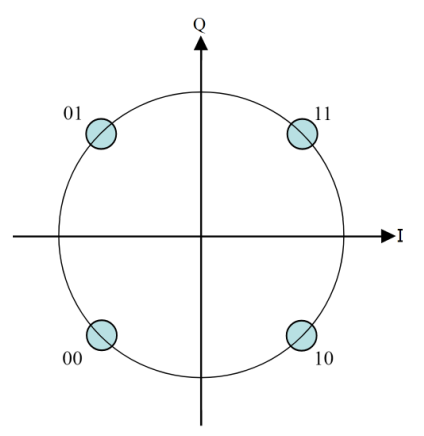

De esta forma, para transmitir un símbolo, generaremos las portadoras en fase y cuadratura, las multiplicaremos por el signo correspondiente y las sumaremos.

\begin{equation}
s_1(t)=\sqrt{\frac{E_s}{2}}\cdot \Big( +\phi_1(t) - \phi_2(t) \Big)\\
s_2(t)=\sqrt{\frac{E_s}{2}}\cdot \Big( -\phi_1(t) - \phi_2(t) \Big)\\
s_3(t)=\sqrt{\frac{E_s}{2}}\cdot \Big( -\phi_1(t) + \phi_2(t) \Big)\\
s_4(t)=\sqrt{\frac{E_s}{2}}\cdot \Big( +\phi_1(t) +\phi_2(t) \Big)
 \tag{35}
\end{equation}

La ventaja de esta codificación es que las componentes $\phi_1(t)$ y $\phi_2(t)$ son ortogonales, es decir:

\begin{equation}
\int_{T_s}^{}\phi_i(t)\phi_j(t)\partial t=\left\{\begin{matrix}1\quad i=j
\\
0\quad i\neq j
\end{matrix}\right.
\tag{36}
\end{equation}
con lo que podemos obtener el signo utilizado para la compositicón del símbolo utilizando $\phi_1(t)$ y $\phi_2(t)$ como filtros adaptados. Es decir, para saber qué símbolo se ha transmitido, pasamos la señal recibida por los filtros adaptados, y comprobaremos a qué símbolo de la constelación se corresponde

En la siguiente celda de código generaremos las señales base y representaremos la constelación de símbolos. En el ejemplo, normalizarmos las señales para poder simular con SNR variable.

80
40.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem p

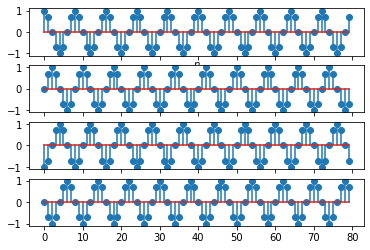

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

omega = np.pi/4
T = np.round(4*np.pi/omega*5).astype(int) #This is the number of samples of the cosine that each symbol will consist of
print(T)
n = np.arange(0,T)
s = np.zeros((4,T))
s[0,:] = np.cos(omega*n) + 0*np.sin(omega*n)
s[1,:] = 0*np.cos(omega*n) + np.sin(omega*n)
s[2,:] = -1*np.cos(omega*n) + 0*np.sin(omega*n)
s[3,:] = 0*np.cos(omega*n) + -1*np.sin(omega*n)
print(np.sum(s[0,:]**2))
fig, axs = plt.subplots(nrows=4, sharex=True)

axs[0].stem(n,s[0,:])
axs[1].stem(n,s[1,:])
axs[2].stem(n,s[2,:])
axs[3].stem(n,s[3,:])
axs[0].set_xlabel('$n$')

plt.show()

1.0000000000000002
50


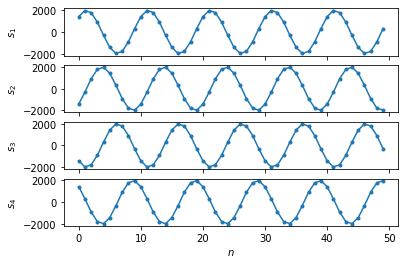

In [ ]:
#@title Crea y representa símbolos
import numpy as np
import matplotlib.pyplot as plt

# constantes y definiciones
Fs = 100e6 # frecuencia de muestreo en Hz
Fc = 10e6 # frecuencia de la portadora en Hz
fc = Fc/Fs # frecuencia discreta de la portadora
Np = 5 # número de periodos de portadora por símbolo
Ts = Np * 1/Fc # periodo de símbolo en segundos
N = np.round(Ts * Fs).astype(int) # periodo del símbolo en muestras
Es = 1 # energía de símbolo
n = np.arange(0,N) # eje de tiempos discreto (muestras)
s = np.zeros((4,N)) # inicializamos a cero los símbolos

# portadoras normalizadas
phi_1 = np.sqrt(2/Ts) * np.cos(2*np.pi*fc*n) # portadora en fase
phi_2 = np.sqrt(2/Ts) * np.sin(2*np.pi*fc*n) # portadora en cuadratura

# símbolos
A = np.sqrt(Es/2) # Amplitud de cada símbolo
s[0,:] = A * (phi_1 + phi_2)  # s1 [11]
s[1,:] = A * (-phi_1 + phi_2) # s2 [01]
s[2,:] = A * (-phi_1 - phi_2) # s3 [00]
s[3,:] = A * (phi_1 - phi_2)  # s4 [10]
print(Ts/N* np.sum(s[0,:]**2))
print(N)
# representa símbolos
fig1, axs = plt.subplots(nrows=4, sharex=True)
axs[0].plot(n,s[0,:], marker='.')
axs[1].plot(n,s[1,:], marker='.')
axs[2].plot(n,s[2,:], marker='.')
axs[3].plot(n,s[3,:], marker='.')
axs[3].set_xlabel('$n$')
axs[0].set_ylabel('$s_1$')
axs[1].set_ylabel('$s_2$')
axs[2].set_ylabel('$s_3$')
axs[3].set_ylabel('$s_4$');

Ahora representaremos la constelación, proyectando las señales sobre la base en fase y cuadratura.

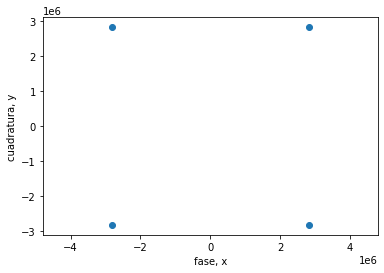

In [ ]:
#@title Representa constelación
# representa constelación
constelacion = np.zeros((2,4))
constelacion[0,0] = 2/N * s[0,:].T @ phi_1
constelacion[1,0] = 2/N * s[0,:].T @ phi_2
constelacion[0,1] = 2/N * s[1,:].T @ phi_1
constelacion[1,1] = 2/N * s[1,:].T @ phi_2
constelacion[0,2] = 2/N * s[2,:].T @ phi_1
constelacion[1,2] = 2/N * s[2,:].T @ phi_2
constelacion[0,3] = 2/N * s[3,:].T @ phi_1
constelacion[1,3] = 2/N * s[3,:].T @ phi_2

fig2, axs = plt.subplots(nrows=1, ncols=1)
axs.hlines(y=0, xmin=-1.5, xmax=1.5, color='black', linewidth=0.5)
axs.vlines(x=0, ymin=-1.5, ymax=1.5, color='black', linewidth=0.5)
axs.scatter(constelacion[0,:],constelacion[1,:])
axs.axis('equal')
axs.set_xlabel('fase, x')
axs.set_ylabel('cuadratura, y');


Vamos ahora a implementar un bucle que genere símbolos aleatoriamente, y despues los contaminaremos con un ruido gaussiano $w(t)\sim N(0,\sigma^2)$ que simulará el ruido al que se ve sometido el sistema de transmisión, siendo la densidad espectral de potencia del ruido $N_o/2$ W/Hz. De esta forma, para cada símbolo transmitido, la señal recibida será:

\begin{equation}
r(t)=s_k(t) + w(t)
 \tag{37}
\end{equation}

Permitiremos al usuario que modifique la SNR.



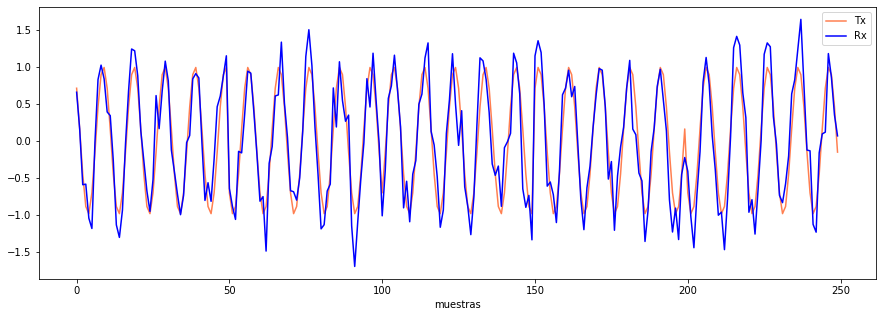

In [ ]:
#@title Ejemplo de transmisión en entorno ruidoso { run: "auto" }
SNR_dB =  7#@param {type:"number"}
# normalizamos primero los símbolos para poder simular SNR y niveles de ruido
# de esta forma, podemos hacer el análisis en función de la SNR ausmiento que
# la potencia de símbolo es 1
SignalPower = 1/N * np.sum(s[0,:]**2)
NUM_SIMBOLOS = 5 # número de símbolos a transmitir
tx_s = np.zeros((NUM_SIMBOLOS, N)) # inicializamos matriz de simbolos enviados
rx_s = np.zeros_like(tx_s)
NoisePow = SignalPower / 10**(SNR_dB/10) # cálculo de potencia de ruidp
# generamos los símbolos aleatorios
for i in range(0,NUM_SIMBOLOS):
    S = np.random.choice(4) # ¿Qué símbolo transmitimos??
    tx_s[i,:] = s[S,:]
    rx_s[i,:] = tx_s[i,:] + np.random.normal(0, np.sqrt(NoisePow), N)
# representa símbolos
fig = plt.figure(figsize=[15, 5])
plt.plot(tx_s.flatten(), color='coral', label='Tx')
plt.plot(rx_s.flatten(), color='blue', label='Rx')
plt.xlabel('muestras')
plt.legend();

Ahora debemos construir el detector. Para cada segmento de señal recibido $r(t)$, debemos descomponerlo en las componentes en fase y cuadratura, usando las respectivas bases, $\phi_1(t)$ y $\phi_2(t)$, como filtros adaptados. Si utilizamos las versiones discretas de las diferentes señales:

\begin{equation}
I=\frac{2}{N}\sum_{n=0}^{N-1}r[n] \phi_1[n] = \frac{2}{N}\sum_{n=0}^{N-1}s_k[n] \phi_1[n]+\frac{2}{N}\sum_{n=0}^{N-1}w[n] \phi_1[n]=\pm\sqrt{\frac{Es}{2}}+W_o\\
Q=\frac{2}{N}\sum_{n=0}^{N-1}r[n] \phi_2[n] = \frac{2}{N}\sum_{n=0}^{N-1}s_k[n] \phi_2[n]+\frac{2}{N}\sum_{n=0}^{N-1}w[n] \phi_2[n]=\pm\sqrt{\frac{Es}{2}}+W_0
 \tag{38}
\end{equation}
con $I$ y $Q$ las componentes en fase y cuadratura del símbolo transmitido, y $W_o$ el ruido a la frecuencia de la portadora, pues es el resultado de correlar el ruido con la sinusoide a la frecuencia portadora. Puesto que el ruido contribuye por igual a todas las frecuencias con $N_o/2$ W/Hz, podemos modelarlo como una Gaussiana $W_o\sim N(0,N_o/2)$.

Ahora formularemos las hipótesis de recepción según este modelo, en el cual cada señal recibida se descompone en dos coordenadas según (33) y (34), esto es, $H_{ij}:r=\{I,Q\}$, con $i = 0,1$ y $j = 0,1$, dando lugar a las siguientes hipótesis y funciones de verosimilitud:

\begin{equation}
H_{11}:\left\{\begin{matrix}
I=+\sqrt{\frac{Es}{2}}+W_o\rightarrow p(I|H_{11})\sim N(+\sqrt{\frac{Es}{2}}, N_o/2)\\
Q=-\sqrt{\frac{Es}{2}}+W_o\rightarrow p(Q|H_{11})\sim N(-\sqrt{\frac{Es}{2}}, N_o/2)
\end{matrix}\right.\\
H_{01}:\left\{\begin{matrix}
I=-\sqrt{\frac{Es}{2}}+W_o\rightarrow p(I|H_{01})\sim N(-\sqrt{\frac{Es}{2}}, N_o/2)\\
Q=-\sqrt{\frac{Es}{2}}+W_o\rightarrow p(Q|H_{01})\sim N(-\sqrt{\frac{Es}{2}}, N_o/2)
\end{matrix}\right.\\
H_{00}:\left\{\begin{matrix}
I=-\sqrt{\frac{Es}{2}}+W_o\rightarrow p(I|H_{00})\sim N(-\sqrt{\frac{Es}{2}}, N_o/2)\\
Q=+\sqrt{\frac{Es}{2}}+W_o\rightarrow p(Q|H_{00})\sim N(+\sqrt{\frac{Es}{2}}, N_o/2)
\end{matrix}\right.\\
H_{10}:\left\{\begin{matrix}
I=+\sqrt{\frac{Es}{2}}+W_o\rightarrow p(I|H_{10})\sim N(+\sqrt{\frac{Es}{2}}, N_o/2)\\
Q=+\sqrt{\frac{Es}{2}}+W_o\rightarrow p(Q|H_{10})\sim N(+\sqrt{\frac{Es}{2}}, N_o/2)
\end{matrix}\right.
\tag{39}
\end{equation}

Para poder hacer la clasificación de los símbolos recibidos, tendremos que obtener las regiones de decisión utilizando los discriminantes según el clasificación bayesiano (10):
\begin{equation}
g_k(x)=\ln{p(x|H_k)}+\ln{P(H_k)}
 \tag{10}
\end{equation}

Para ello necesitamos las funciones de densidad de probabilidad (verosimilitud) de cada hipótesis, $p(r|H_{ij})$. Asumiendo que el ruido es banco Gaussiano con muestras i.i.d., la función de verolimilitud conjunta de cada hipótesis es el producto de las dos funciones de verosimilitud de las componentes en fase y cuadratura:

\begin{equation}
p(r|H_{ij})=p(I|H_{ij})\cdot p(Q|H_{ij})=\frac{1}{\sqrt{\pi N_o}}e^{-\frac{\big (I-\big (\pm\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}} \cdot \frac{1}{\sqrt{\pi N_o}}e^{-\frac{\big (Q-\big (\pm\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}}=\frac{1}{\pi N_o}e^{-\frac{\big (I-\big (\pm\sqrt{\frac{Es}{2}}\big )\big )^2+\big (Q-\big (\pm\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}}
 \tag{40}
\end{equation}
y resolviendo para cada hipótesis:

\begin{equation}
p(r|H_{11})=\frac{1}{\pi N_o}e^{-\frac{\big (I-\big (\sqrt{\frac{Es}{2}}\big )\big )^2+\big (Q-\big (-\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}}=\frac{1}{\pi N_o}e^{-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}}\\
p(r|H_{01})=\frac{1}{\pi N_o}e^{-\frac{\big (I-\big (-\sqrt{\frac{Es}{2}}\big )\big )^2+\big (Q-\big (-\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}}=\frac{1}{\pi N_o}e^{-\frac{I^2+Q^2+E_s+2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}}\\
p(r|H_{00})=\frac{1}{\pi N_o}e^{-\frac{\big (I-\big (-\sqrt{\frac{Es}{2}}\big )\big )^2+\big (Q-\big (\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}}=\frac{1}{\pi N_o}e^{-\frac{I^2+Q^2+E_s+2I\sqrt{\frac{Es}{2}}-2Q\sqrt{\frac{Es}{2}}}{N_o}}\\
p(r|H_{10})=\frac{1}{\pi N_o}e^{-\frac{\big (I-\big (\sqrt{\frac{Es}{2}}\big )\big )^2+\big (Q-\big (\sqrt{\frac{Es}{2}}\big )\big )^2}{N_o}}=\frac{1}{\pi N_o}e^{-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}-2Q\sqrt{\frac{Es}{2}}}{N_o}}
 \tag{41}
\end{equation}

Asumiendo que la probabilidad de envío de cada símbolo es la misma, podemos prescindir del segundo término en (10). Ahora, si aplicamos logaritmos y despreciamos el primer término resultante $\ln{\frac{1}{\pi N_o}}$ que es igual para todos, tendremos los discriminantes:

\begin{equation}
g_{11}(r)=-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}\\
g_{01}(r)=-\frac{I^2+Q^2+E_s+2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}\\
g_{00}(r)=-\frac{I^2+Q^2+E_s+2I\sqrt{\frac{Es}{2}}-2Q\sqrt{\frac{Es}{2}}}{N_o}\\
g_{10}(r)=-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}-2Q\sqrt{\frac{Es}{2}}}{N_o}
 \tag{42}
\end{equation}

El decisor escogera la hipótesis $H_{ij}$ cuando el discriminante $g_{ij}(r)$ sea mayor que el resto. Comenzamos por la hipótesis $H_{11}$, que es el caso de que enviamos el símbolo $\{11\}$, con lo que $g_{11}$ debe ser mayor que el resto:

Comenzamos con $g_{11}(r)>g_{01}(r)$:

\begin{equation}
-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}>-\frac{I^2+Q^2+E_s+2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}\rightarrow I>0
 \tag{43}
\end{equation}

Seguimos con $g_{11}(r)>g_{00}(r)$:

\begin{equation}
-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}>-\frac{I^2+Q^2+E_s+2I\sqrt{\frac{Es}{2}}-2Q\sqrt{\frac{Es}{2}}}{N_o}\rightarrow I+Q>0
 \tag{44}
\end{equation}

Y acabamos con $g_{11}(r)>g_{10}(r)$:

\begin{equation}
-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}+2Q\sqrt{\frac{Es}{2}}}{N_o}>-\frac{I^2+Q^2+E_s-2I\sqrt{\frac{Es}{2}}-2Q\sqrt{\frac{Es}{2}}}{N_o}\rightarrow Q>0
 \tag{45}
\end{equation}

Es decir, que escogeremos $H_{11}$ cuando la señal recibida sea tal que el par $\{I,Q\}$ pertenecen a la región de decisión $R_{00}=\{I>0, Q>0\}$. A la vista de lo anterior, y como ya intuimos si observamos la constelación, es fácil deducir que las regiones de decisión dependerán de los signos de $I$ y $Q$, de forma tal que:

\begin{equation}
R_{11}=\{I > 0, Q > 0\}\\
R_{01}=\{I < 0, Q > 0\}\\
R_{00}=\{I < 0, Q < 0\}\\
R_{10}=\{I > 0, Q < 0\}
 \tag{46}
\end{equation}

En el siguiente código implementaremos el generador aleatorio de símbolos, añadiremos el ruido simulando la transmisión, aplicaremos los filtros adaptados para obtener las componentes en fase y cuadratura, y finalmente dibujaremos la constelación resultante. Dejarmos a elección del usuario la SNR en dB y el número de símbolos a enviar.

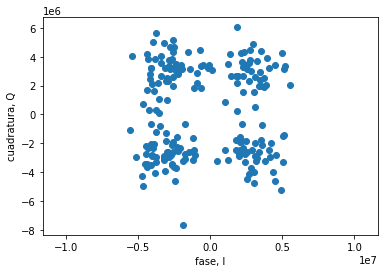

In [ ]:
#@title Ejemplo de recepción y constelación QPSK en entorno ruidoso { run: "auto" }
SNR_dB =  -6#@param {type:"number"}
NUM_SIMBOLOS =  200#@param {type:"integer"}
# normalizamos primero los símbolos para poder simular SNR y niveles de ruido
# de esta forma, podemos hacer el análisis en función de la SNR ausmiento que
# la potencia de símbolo es 1
SignalPower = 1/N * np.sum(s[0,:]**2)
#NUM_SIMBOLOS = 1000 # número de símbolos a transmitir
I = np.zeros(NUM_SIMBOLOS) # inicializamos componentes en fase recibidas
Q = np.zeros(NUM_SIMBOLOS) # inicializamos componentes en fase recibidas
NoisePow = SignalPower / 10**(SNR_dB/10) # cálculo de potencia de ruido

# generamos los símbolos aleatorios
for i in range(0,NUM_SIMBOLOS):
    S = np.random.choice(4) # ¿Qué símbolo transmitimos??
    tx_s = s[S,:] # selecciona el símbolo tx
    # recive símbolo, añadiendo ruido
    rx_s = tx_s + np.random.normal(0, np.sqrt(NoisePow), N)

    # descompone en fase y cuadratura con filtro adaptado
    I[i] = 2/N * rx_s.T @ phi_1
    Q[i] = 2/N * rx_s.T @ phi_2

#Representa constelación de símbolos recibidos
fig4, axs = plt.subplots(nrows=1, ncols=1)
axs.hlines(y=0, xmin=-1.5, xmax=1.5, color='black', linewidth=0.5)
axs.vlines(x=0, ymin=-1.5, ymax=1.5, color='black', linewidth=0.5)
axs.scatter(I, Q)
axs.axis('equal')
axs.set_xlabel('fase, I')
axs.set_ylabel('cuadratura, Q');


## Ejercicio

Implemente a continuación el código del decisor, desarrolle el cálculo de la probabilidad de error de cada símbolo y la probabilidad de error total, y compárelas con las empíricas para cada simulación que se realice.

Para esta tarea, aproveche el código de la celda anterior.


# Clasificadores bayesianos no tan ingenuos...

En algunos casos nos encontraremos con experimentos asociados a variables aleatorias multidimensionales que, aún siendo gausianas, no son independientes. En estos casos, tendremos que tener en cuenta la relación existente entre ellos utilizando la matriz de covarianza que los relaciona estadísticamente.

En muchas aplicaciones, el problema no es que las señales sean deterministas y estén contaminadas por ruido, si no que las variables que queremos clasificar son de naturaleza inherentemente aleatoria. Pongamos por ejemplo la tirada de un jugador de dardos, en la que la ubicación del punto donde cae el dardo no está afectada por el ruido, si no por el caracter fluctuante de la mecánica asociada al lanzamiento. Otro ejemplo sería un clasificador de órdenes de voz, que recibirá la misma orden con multitud de diferentes inflexiones según quien hable. En estos casos, las observaciones proceden de fuentes de información de las que tenemos que extraer características que aporten información del proceso, y que generalmente no son independientes entre sí. En estos casos, las características $\underline{s_k}=\{s_{k1}, s_{k2}, ...,s_{kN}\}$ son una variable aleatoria multidimensional, que tendrá una función de densidad de probabilidad conjunta diferente bajo cada hipótesis. Las observaciones $\underline{x}=\{x_1, x_2, ...,x_N\}$ serán realizaciones de esta variable aleatoria.

\begin{equation}
H_0 : \underline{x} = \underline{s}_1\\
H_1 : \underline{x} = \underline{s}_2\\
\vdots \\
H_{M-1} : \underline{x} = \underline{s}_{M}
 \tag{47}
\end{equation}

Supongamos que queremos utilizar el criterio del *máximo a posteriori* (MAP) y supongamos que bajo cada clase, las observaciones siguen una distribución Gaussiana multidimensional, de forma que la función de densidad de probabilidad conjunta de la hipótesis *k-ésima* será del tipo Gaussiano multidimensional, $H_k\sim N(\mu_k, C_k)$, con lo que la función de verosimilitud de las observaciones bajo cada hipótesis será de la forma:

\begin{equation}
p(\underline{x}|H_k)=\frac{1}{(2\pi)^{N/2}|C_k|^{1/2}}e^{-\frac{1}{2}(\underline{x}-\underline{\mu}_k)^T C_k^{-1}(\underline{x}-\underline{\mu}_k)}
 \tag{48}
\end{equation}

con $\underline{\mu}_k$ el vector de medias:

\begin{equation}
\underline{\mu}_k=\begin{pmatrix}\mu_{k1}\\
\vdots \\
\mu_{kN}
\end{pmatrix}=\begin{pmatrix}E\{s_{k1}\}\\
\vdots \\
E\{s_{kN}\}
\end{pmatrix}
 \tag{49}
\end{equation}

y $C_k$ la matriz de covarianzas:

\begin{equation}
C_k=\begin{pmatrix}
\sigma_{k11} & \cdots  &\sigma_{k1N} \\
 \vdots & \ddots  & \vdots \\
 \sigma_{kN1}& \cdots  & \sigma_{kNN}
\end{pmatrix}
 \tag{50}
\end{equation}

con $\sigma_{kij}$ la covarianza entre $s_i$ y $s_j$ bajo la hipótesis $k$:

\begin{equation}
\sigma_{kij}=E\big\{ (s_{ki}-\mu_{ki})(s_{kj}-\mu_{kj})\big\}
 \tag{51}
\end{equation}

De esta forma, si sustituimos (48) en (10), aplicamos logaritmos y eliminamos los términos comunes, obtenemos las funciones discriminantes:

\begin{equation}
g_k=-\frac{1}{2}(\underline{x}-\underline{\mu}_k)^T C_k^{-1}(\underline{x}-\underline{\mu}_k)-\frac{1}{2}\ln{(|C_k|)}+\ln{(P(H_k))}
 \tag{52}
\end{equation}

# Ejemplos de clasificador bayesiano MAP:

En los siguientes ejercicios se plantean problemas complejos de tratamiento estadístico de la información, lo que los modernos vienen llamando inteligencia artificial.


## 1. El dilema de los tiradores de dardos.

Tres amigos acuden regularmente a un bar a jugar a los dardos. Cada tirada tiene un coste fijo de 0.10 €, que los tiradores deben abonar al finalizar la partida. La máquina debería contar las tiradas de cada jugador, pero lamentablemente se ha averiado y solo ha registrado la ubicación de las tiradas de las últimas partidas, pero no quién lanzó cada dardo. Eso sí, La máquina tiene almacenados en registros de memoria las tiradas de cada jugador durante el último mes. Los jugadores, a los que les ha sentado mal una fanta que se han tomado, no recuerdan cuantos dardos ha lanzado cada uno ni quien dió más veces cerca de la diana en cada partida, y se enzarzan en una discusión sobre cuánto debe pagar cada uno.

Afortunadamente se encuentra en el bar tomando fantas un grupo de estudiantes del Máster de Teleco, y el asustado camarero, sabiendo que son unos frikis, les pide que le den una solución que pueda resolver el problema de la forma más justa posible. Para ello pone a disposición del grupo de estudiantes varios registros de datos. Los tres primeros contienen las tiradas del último mes de cada jugador, en forma de archivo de texto con dos columnas, en las que se han guardado, en centímetros, la ubicación de las tiradas en la diana según un eje $\{X,Y\}$, cuyo origen se encuentra en el centro de la diana. El resto de registros guarda la posición de las tiradas de cada partida, de las que se quiere sacar el número de tiradas de cada jugador.

1. Diseñe un clasificador que resuelva el problema minimizando el error en la clasificación, asumiendo que las medidas de los ejes $X$ e $Y$ no tienen relación entre ellas en ninguno de los casos, y que la probabilidad de tirada de cada jugador es la misma. Justifique todas las decisiones que tome (caracterice complemamente el decisor), no vaya a ser que le hagan pagar a usted.

2. Conteste a las siguientes preguntas razonadamente
  * 2.1. ¿Qué paga cada uno de los tiradores en cada una de las partidas?
  * 2.2. Si se mantiene el mismo sistema de conteo, ¿quién saldrá ganando y quien perdiendo? ¿Por qué?
  * 2.3. ¿Quien es más probable que acierte a la diana? ¿Por qué?

## 2. El ornitólogo surfer.

Un estudiante de ornitología está realizando una tesis doctoral sobre la variedad de aves en la jungla brasileña en la época de lluvias, y debe registrar el número y especie de las aves que habitan cierta zona concreta. Puesto que el estudio debe incluir las 24 horas del día, y dada la densidad de la vegetación de la jungla y las pocas ganas que tiene de empaparse miserablemente en un pueblo perdido de la selva pudiendo estar haciendo surf en las playas de Río, decide pedirle a su pareja, que está estudiando primer curso del máster de teleco, que le diseñe un sistema capaz de clasificar la especie de las aves según su canto a partir de grabaciones, pues así podrían dejar grabando los sonidos durante días en diferentes zonas mientras se dan la vida padre y madre. Y su pareja, que es muy friki, va y acepta, entre otras cosas porque tambén prefiere estar haciendo surf.

Para poder diseñar el sistema, la o el teleñeco le pide a su pareja, por un lado, grabaciones sin presencia de aves de los diferentes escenarios en los que se encontrarán los micrófonos, y por otro grabaciones de las aves por separado.

1. Diseñe el sistema que resuelva el problema de su pareja. Tenga en cuenta que el sistema debe, primero detectar (con una probabilidad de error dada por su pareja), y después clasificar (con la menor probabilidad de error posible) y contar los pajaritos de marras. Asuma que la probabilidad de presencia de todas las aves es la misma, salvo la del tucán cojonero, que es el doble de la de cualquier otra. Asuma también que durante las grabaciones en cada entorno, no cambian las condiciones ambientales y el sonido (ruido) es el mismo, tanto en su distribución como en intensidad. Lamentablemente,  las aves sí pueden cantar con diferente intensidad y a diferente distancia del micrófono. Debe justificar todas las elecciones que haga, no sea que luego suspendan a su pareja y le eche la culpa a usted, que luego a ver quien aguanta otra temporada de lluvias en la selva contando pajaritos...

2. Responda razonadamente las siguientes preguntas:
  * 2.1. ¿Cómo establece el umbral de detección? ¿De qué depende?
  * 2.2. En cada registro, ¿Cuántos pájaros hay de cada especie?
  * 2.3. Si no supiera en qué zona se grabó cada registro, ¿podría identificarlas automáticamente? ¿Cómo?